In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split as tts

In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
train.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,Ideal,G,VVS2,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,Ideal,H,VS2,62.7,57.0,5.86,5.82,3.66,2692


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [5]:
train.carat.value_counts()

0.30    1974
0.31    1685
1.01    1674
0.70    1479
0.32    1379
        ... 
3.65       1
3.02       1
3.22       1
4.01       1
2.65       1
Name: carat, Length: 266, dtype: int64

In [6]:
train.cut.value_counts()

Ideal        16193
Premium      10301
Very Good     9030
Good          3710
Fair          1221
Name: cut, dtype: int64

In [7]:
train.color.value_counts() 

G    8459
E    7346
F    7174
H    6273
D    5019
I    4065
J    2119
Name: color, dtype: int64

In [8]:
train.clarity.value_counts() 

SI1     9746
VS2     9175
SI2     6912
VS1     6137
VVS2    3822
VVS1    2732
IF      1367
I1       564
Name: clarity, dtype: int64

In [9]:
train.depth.value_counts() 

62.0    1668
61.9    1598
61.8    1557
62.1    1507
62.2    1485
        ... 
52.3       1
69.3       1
70.0       1
51.0       1
54.7       1
Name: depth, Length: 173, dtype: int64

In [10]:
train.table.value_counts() 

56.0    7415
57.0    7328
58.0    6268
59.0    4930
55.0    4716
        ... 
61.8       1
63.5       1
57.9       1
63.4       1
71.0       1
Name: table, Length: 122, dtype: int64

In [11]:
dic_para_cut = {"Ideal": 2,
                "Premium": 1,
                "Very Good":3 ,
                "Good":4,
                "Fair":5 }

In [12]:
train.cut = train.cut.map(dic_para_cut)

In [13]:
dic_para_color = {"G":4,
                  "E":2,
                  "F":3,
                  "H":5,
                  "D":1,
                  "I":6,
                  "J":7}


In [14]:
train.color = train.color.map(dic_para_color)

In [15]:
dic_para_clarity = {"VVS2": 3,
                    "VS2": 5,
                    "VS1": 4,
                    "SI2": 7,
                    "SI1": 6,
                    "VVS1": 2,
                    "IF": 1 ,
                    "I1" : 8,
                   }

In [16]:
train.clarity = train.clarity.map(dic_para_clarity)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  int64  
 3   color    40455 non-null  int64  
 4   clarity  40455 non-null  int64  
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 3.4 MB


In [18]:
corr = train.corr()

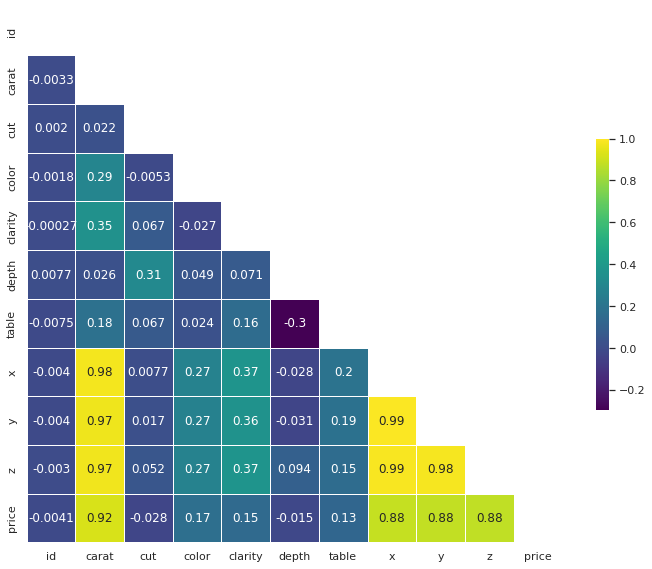

In [19]:
mascara5 = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,
            mask = mascara5,
            cmap='viridis',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
);

In [20]:
train.drop(["x","y","z"], axis=1, inplace=True)

In [21]:
train.head(5)

,id,carat,cut,color,clarity,depth,table,price
0,0,1.14,2,4,3,61.0,56.0,9013
1,1,0.76,2,5,5,62.7,57.0,2692
2,2,0.84,2,4,4,61.4,56.0,4372
3,3,1.55,2,5,4,62.0,57.0,13665
4,4,0.30,2,4,7,61.9,57.0,422


In [22]:
corr = train.corr()

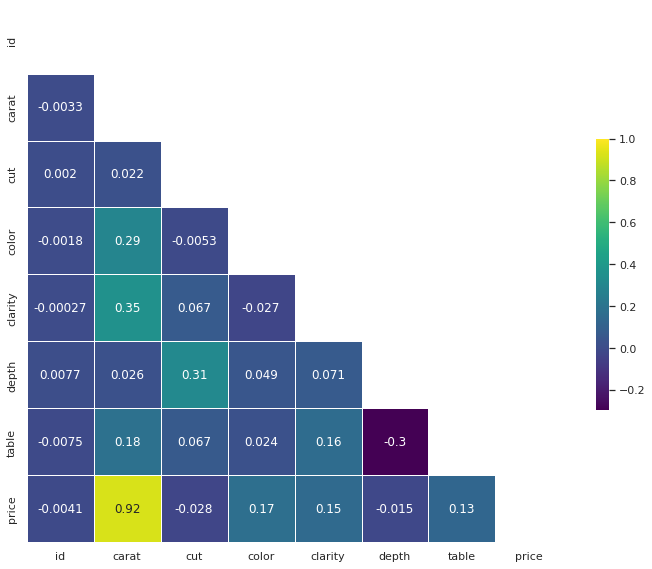

In [23]:
mascara5 = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,
            mask = mascara5,
            cmap='viridis',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
);

In [24]:
train.to_csv("data/train_clean.csv", index=False)